####  LOGISTIC REGRESSION MODEL

In [24]:
df = pd.read_csv("C:/Users/Arohan/Downloads/STUDENTS.csv")

In [25]:
df.head()

,JEEPRE,JEEMAINS,STATUS
0,37.3346,35.5446,0
1,38.4235,53.5663,0
2,44.3423,46.5458,0
3,48.4224,56.2263,0
4,71.4234,74.5436,1


In [31]:
df['STATUS'].value_counts()  ### Balanced and Imbalanced Classes

1    6
0    4
Name: STATUS, dtype: int64

In [32]:
df.shape

(10, 3)

In [41]:
df = df.sample(frac=1)

In [42]:
df.head()

,JEEPRE,JEEMAINS,STATUS
6,93.5345,89.5588,1
7,93.4324,92.9786,1
8,93.3250,98.2424,1
1,38.4235,53.5663,0
3,48.4224,56.2263,0


In [44]:
from sklearn.model_selection import train_test_split

In [47]:
train,test = train_test_split(df,test_size= 0.3, random_state= 1234)

In [48]:
train.shape

(7, 3)

In [49]:
train['STATUS'].value_counts()

1    4
0    3
Name: STATUS, dtype: int64

In [52]:
y_train = train['STATUS']
X_train = train[['JEEPRE','JEEMAINS']]

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lc = LogisticRegression()

In [55]:
model = lc.fit(X_train,y_train)

In [64]:
model.coef_

array([[0.24500979, 0.19589761]])

In [65]:
model.score(X_train,y_train)

1.0

In [58]:
X_test = test[['JEEPRE','JEEMAINS']]
y_test = test['STATUS']

In [66]:
pred = model.predict(X_test)
pred

array([1, 1, 0], dtype=int64)

In [99]:
actual_pred = model.predict(df[['JEEPRE','JEEMAINS']])

In [100]:
actual_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [70]:
s = pd.Series(actual_pred)

In [80]:
model.predict_proba(X_test)

array([[5.93125787e-04, 9.99406874e-01],
       [4.70570965e-07, 9.99999529e-01],
       [9.99989149e-01, 1.08511666e-05]])

In [101]:
df1 = pd.concat([df,s],axis = 1)
df1.to_csv("E://Predicted Students Ouput.csv")

In [103]:
df1.head(10)

,JEEPRE,JEEMAINS,STATUS,0
6,93.5345,89.5588,1,1
7,93.4324,92.9786,1,1
8,93.3250,98.2424,1,1
1,38.4235,53.5663,0,1
3,48.4224,56.2263,0,0
2,44.3423,46.5458,0,1
9,95.3242,91.5477,1,0
5,78.4240,80.4325,1,0
4,71.4234,74.5436,1,0
0,37.3346,35.5446,0,1


In [82]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [91]:
1- accuracy_score(y_test,pred)

0.0

In [87]:
confusion_matrix(y_test,pred)

array([[1, 0],
       [0, 2]], dtype=int64)

<Axes: >

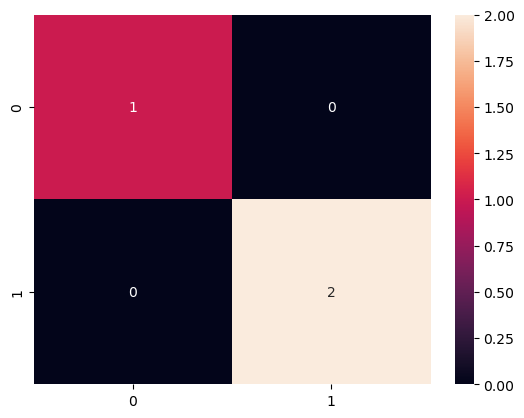

In [92]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot = True)